In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [16]:
#read the csv file 
gold_data=pd.read_csv("sankari_107_ml_project_2_random_forest_regressor.csv")
print(gold_data)



           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [17]:
#print the first ten rows
print(gold_data.head(10))

        Date          SPX        GLD        USO        SLV   EUR/USD
0   1/2/2008  1447.160034  84.860001  78.470001  15.180000  1.471692
1   1/3/2008  1447.160034  85.570000  78.370003  15.285000  1.474491
2   1/4/2008  1411.630005  85.129997  77.309998  15.167000  1.475492
3   1/7/2008  1416.180054  84.769997  75.500000  15.053000  1.468299
4   1/8/2008  1390.189941  86.779999  76.059998  15.590000  1.557099
5   1/9/2008  1409.130005  86.550003  75.250000  15.520000  1.466405
6  1/10/2008  1420.329956  88.250000  74.019997  16.061001  1.480100
7  1/11/2008  1401.020020  88.580002  73.089996  16.077000  1.479006
8  1/14/2008  1416.250000  89.540001  74.250000  16.280001  1.486900
9  1/15/2008  1380.949951  87.989998  72.779999  15.834000  1.480210


In [18]:
#Check the number of rows and columns
gold_data.shape

(2290, 6)

In [19]:
#Getting some basic information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
#check the missing datas
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
#getting the statstical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
# Convert 'Date' to daytime because we faced value error while we find the correlation.
gold_data['Date'] = pd.to_datetime(gold_data['Date']).dt.strftime('%Y%m%d').astype(int)
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   int32  
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 98.5 KB


In [28]:
#find the correlation 
correlation=gold_data.corr()

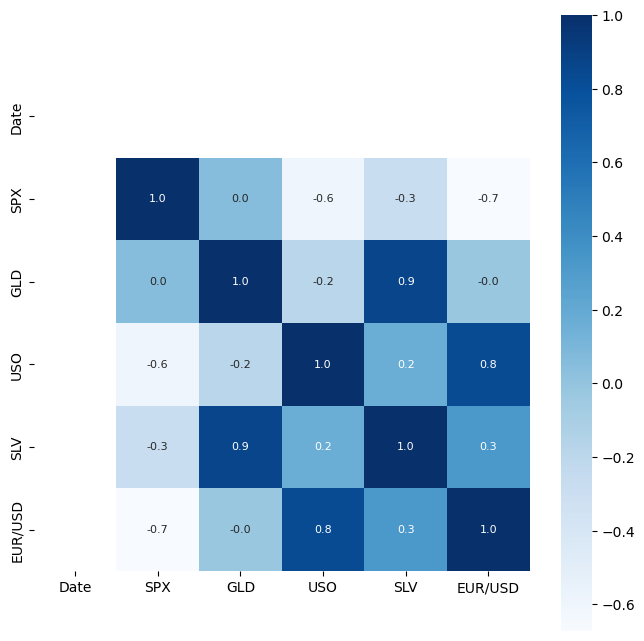

In [29]:
#construct the heat map to analyise the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()


In [30]:
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

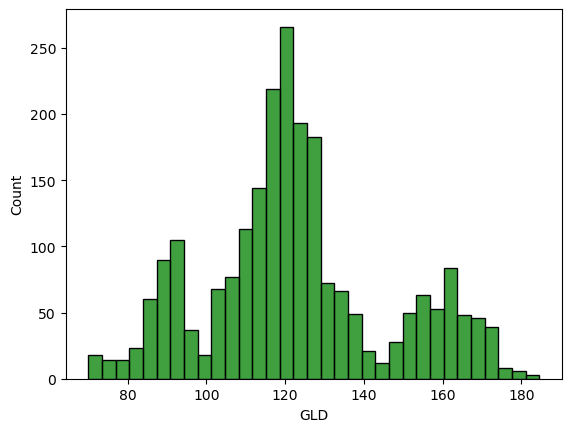

In [32]:
#Check the distribution of the goldprice
sns.histplot(gold_data['GLD'], color='green')

C:\Users\sanka\AppData\Local\Temp\ipykernel_17444\992316202.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

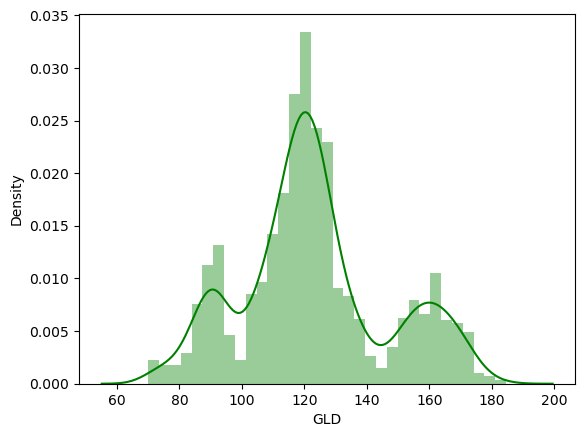

In [34]:
#Check the distribution of the goldprice
sns.distplot(gold_data['GLD'], color='green')

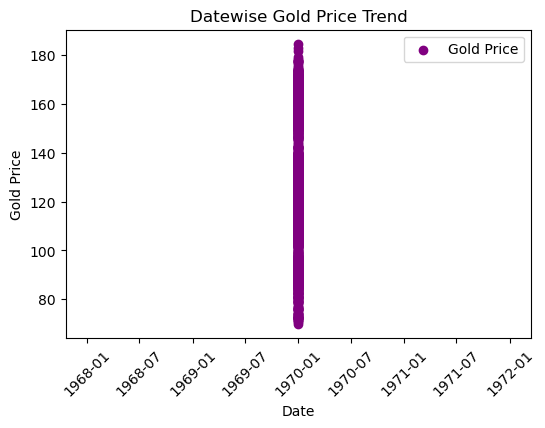

In [62]:
# Scatter Plot for Exact Date & Price
plt.figure(figsize=(6, 4))
plt.scatter(gold_data['Date'], gold_data['GLD'], color='purple', label='Gold Price')



plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title("Datewise Gold Price Trend")
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

In [38]:
#convert from date intp datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'].astype(str), format='%Y%m%d')
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [40]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1970-01-01,1447.160034,84.860001,78.470001,15.180,1.471692
1,1970-01-01,1447.160034,85.570000,78.370003,15.285,1.474491
2,1970-01-01,1411.630005,85.129997,77.309998,15.167,1.475492
3,1970-01-01,1416.180054,84.769997,75.500000,15.053,1.468299
4,1970-01-01,1390.189941,86.779999,76.059998,15.590,1.557099


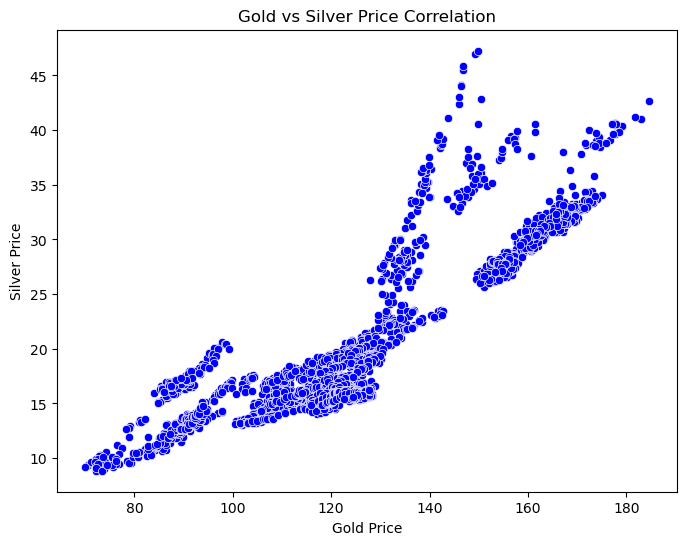

In [53]:
#COMPARSION OF GOLD AND SILVER PRICE

plt.figure(figsize=(8, 6))
sns.scatterplot(x=gold_data['GLD'], y=gold_data['SLV'], color='blue')

plt.xlabel("Gold Price")
plt.ylabel("Silver Price")
plt.title("Gold vs Silver Price Correlation")

plt.show()


In [64]:
gold_data['Date'] = pd.to_datetime(gold_data['Date']).dt.strftime('%Y%m%d').astype(int)
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   int32  
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 98.5 KB


In [70]:
#splitting feature and targeted data
x=gold_data.drop(columns=['GLD'], axis=1)
y=gold_data['GLD']

In [71]:
x,y

(          Date          SPX        USO      SLV   EUR/USD
 0     19700101  1447.160034  78.470001  15.1800  1.471692
 1     19700101  1447.160034  78.370003  15.2850  1.474491
 2     19700101  1411.630005  77.309998  15.1670  1.475492
 3     19700101  1416.180054  75.500000  15.0530  1.468299
 4     19700101  1390.189941  76.059998  15.5900  1.557099
 ...        ...          ...        ...      ...       ...
 2285  19700101  2671.919922  14.060000  15.5100  1.186789
 2286  19700101  2697.790039  14.370000  15.5300  1.184722
 2287  19700101  2723.070068  14.410000  15.7400  1.191753
 2288  19700101  2730.129883  14.380000  15.5600  1.193118
 2289  19700101  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 5 columns],
 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

In [72]:
#splitting the data for training and test
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [73]:
#Define the model
model=RandomForestRegressor(n_estimators=100)


In [74]:
#Trained the model
model.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
#evaluate the model on test data
test_data_prediction=model.predict(x_test)
print(test_data_prediction)


[168.65759935  81.98809976 115.98669986 127.64450084 120.65880175
 154.70529768 150.07229823 125.97870034 117.49779894 126.02900068
 116.94920054 171.36720092 142.11059938 168.13859888 115.24450021
 117.7422005  137.59920256 170.22250126 160.03710348 160.30689887
 155.15480036 125.49710012 175.3357995  157.03320314 125.17740039
  93.58179957  77.1548001  120.62949996 119.04569952 167.3915996
  88.18240072 125.2704      91.14210104 117.86190025 121.04189954
 136.34270132 115.21310134 114.90110082 146.77699951 107.28490114
 104.57300261  87.30199781 126.5650006  118.09500016 153.62629867
 119.87959988 108.28889976 108.01279778  93.15810035 127.12789778
  75.27180034 113.67689916 120.96370034 111.37999962 118.84939888
 121.01599919 159.19819938 169.64060075 147.02159663  85.85799837
  94.38610056  86.76509877  90.58390004 118.80460073 126.49130041
 127.58110011 168.86049954 122.20339947 117.3302991   98.34350048
 167.85490132 143.08159872 131.99240219 121.23710235 120.78909955
 119.545400

In [80]:
#Find the accuracy level by R_Squared_Error
error_value=metrics.r2_score(test_data_prediction,y_test)
print("R_Squared_Error:", error_value)

R_Squared_Error: 0.9892951419835535


In [81]:
#evaluate the model on test data
train_data_prediction=model.predict(x_train)
print(train_data_prediction)
error_value=metrics.r2_score(train_data_prediction,y_train)
print("R_Squared_Error:", error_value)

[109.87969814 114.83930078  90.8089001  ... 130.80559717 159.76439548
 114.79399947]
R_Squared_Error: 0.998404194244259


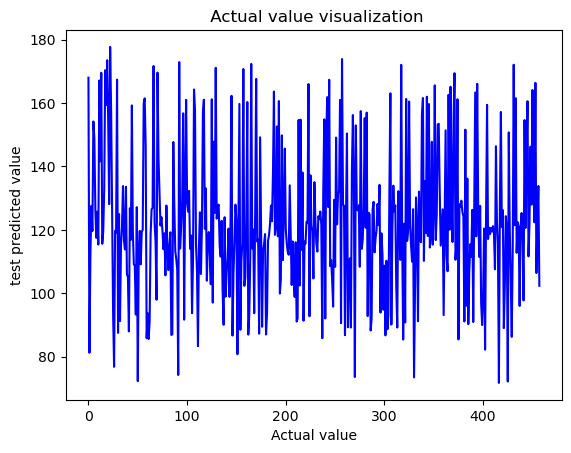

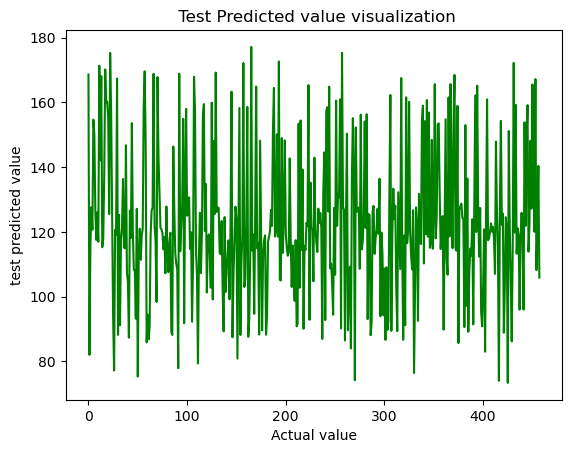

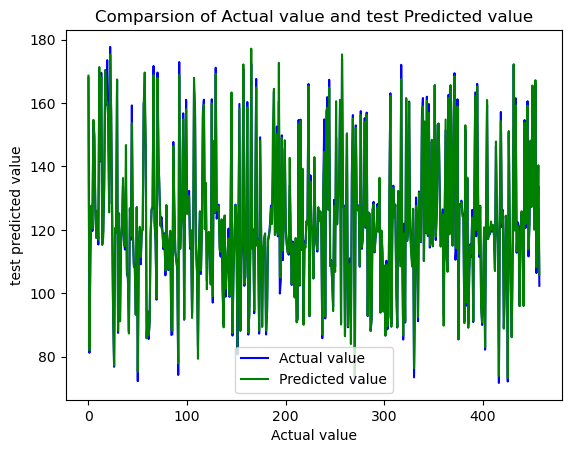

In [87]:
#Now, compare the actual test value and test_data_prediction value in the plot
y_test=list(y_test)

plt.plot(y_test, color="blue", label="Actual value")

plt.title(" Actual value visualization")
plt.xlabel("Actual value")
plt.ylabel("test predicted value")

plt.show()

plt.plot(test_data_prediction, color="green", label="Predicted value")
plt.title(" Test Predicted value visualization")
plt.xlabel("Actual value")
plt.ylabel("test predicted value")

plt.show()

plt.plot(y_test, color="blue", label="Actual value")
plt.plot(test_data_prediction, color="green", label="Predicted value")
plt.title("Comparsion of Actual value and test Predicted value")
plt.xlabel("Actual value")
plt.ylabel("test predicted value")
plt.legend()
plt.show()